# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

## Background Information

The aim of this project is to use a dataset (powerproduction.csv) to create a model which makes predictions about the wind turbine power output (y) based in the wind speed input (x).

A wind turbine produces electricity by using the kinetic or moving energy of wind to create motion. The amount of electricity that a single turbine is able to produce depends on its size, the wind speed and the efficiency with which that specifically designed turbine is able to convert wind energy to electrical energy. The wind turbine will start operating at wind speeds of four to five metres per second. At speeds of 15 metres per second, the wind turbine will reach its maximum output. If the wind speeds reach 25 metres per second or greater, the turbine will be shut down to avoid damage to the turbine occurring. Therefore Wind energy is not a particularly reliable source of energy.

![https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.energy.gov%2Fsites%2Fprod%2Ffiles%2Fstyles%2Fborealis_photo_gallery_large_respondmedium%2Fpublic%2F2017%2F06%2Ff34%2Fwind_graphic.jpg%3Fitok%3DhwAc2zRU&imgrefurl=https%3A%2F%2Fwww.energy.gov%2Feere%2Farticles%2Fhow-do-wind-turbines-survive-severe-storms&tbnid=8YmI_ecoW43E0M&vet=12ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ..i&docid=iYnKIcxc0OBeFM&w=525&h=276&q=wind%20turbine%20speed&ved=2ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ](attachment:image.png)

In 1919, the physicist Albert Betz showed that for a hypothetical ideal wind-energy extraction machine, the fundamental laws of conservation of mass and energy allowed no more than 16/27 (59.3%) of the kinetic energy of the wind to be captured. This Betz' law limit can be approached by modern turbine designs which may reach 70 to 80% of this theoretical limit.

The speed at which a wind turbine rotates must be controlled for efficient power generation and to keep the turbine components within designed speed and torque limits. The centrifugal force on the spinning blades increases as the square of the rotation speed, which makes this structure sensitive to overspeed. Because the power of the wind increases as the cube of the wind speed, turbines have to be built to survive much higher wind loads (such as gusts of wind) than those from which they can practically generate power. Wind turbines have ways of reducing torque in high winds.

A wind turbine is designed to produce power over a range of wind speeds. The cut-in speed is around 3–4 m/s for most turbines, and cut-out at 25 m/s. If the rated wind speed is exceeded the power has to be limited. There are various ways to achieve this. A control system involves three basic elements: sensors to measure process variables, actuators to manipulate energy capture and component loading, and control algorithms to coordinate the actuators based on information gathered by the sensors. All wind turbines are designed for a maximum wind speed, called the survival speed, above which they will be damaged. The survival speed of commercial wind turbines is in the range of 40 m/s (144 km/h, 89 MPH) to 72 m/s (259 km/h, 161 MPH). The most common survival speed is 60 m/s (216 km/h, 134 MPH). Some have been designed to survive 80 metres per second (290 km/h; 180 mph).

These are the references used as part of this project:

1. https://en.wikipedia.org/wiki/Wind_turbine
2 https://en.wikipedia.org/wiki/Wind_turbine_design
3. https://enerpower.ie/portfolio/wind-turbine-faq-ireland/
4. https://www.bordnamona.ie/company/our-businesses/powergen/frequently-asked-questions/
5. https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
6. https://realpython.com/linear-regression-in-python/
7. https://medium.com/@dvelsner/deploying-a-simple-machine-learning-model-in-a-modern-web-application-flask-angular-docker-a657db075280
8. https://www.analyticsvidhya.com/blog/2020/09/integrating-machine-learning-into-web-applications-with-flask/
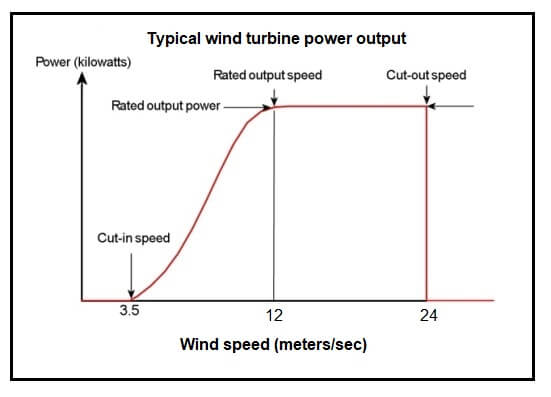

<br>

## 1. Import required libraries
***

Keras:
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. TensorFlow 2.0 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming.

Pandas:
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

Numpy:
Numpy creates random data. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

Matplotlib:
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

Seaborn:
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns

# Import required libraries
import sklearn as sk
import sklearn.cluster as skcl

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
import sklearn.neural_network as sknn

# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor



In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

## 2. Simple Investigation of the dataset
***

This is performed so I can get an understanding of the data and the shape of the line as there is not much detail about the dataset eg units of measurement, the timeframe the data is taken, is the data from one or many turbines, location etc.

There is only one input, speed, and one output, power.

In [3]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

df.head(10) # displays the first 10 rows of the data set as a table/array



,speed,power
0,0.000,0.00
1,0.125,0.00
2,0.150,0.00
3,0.225,0.00
4,0.275,0.00
5,0.325,4.33
6,0.400,5.19
7,0.450,3.83
8,0.501,1.05
9,0.526,5.55


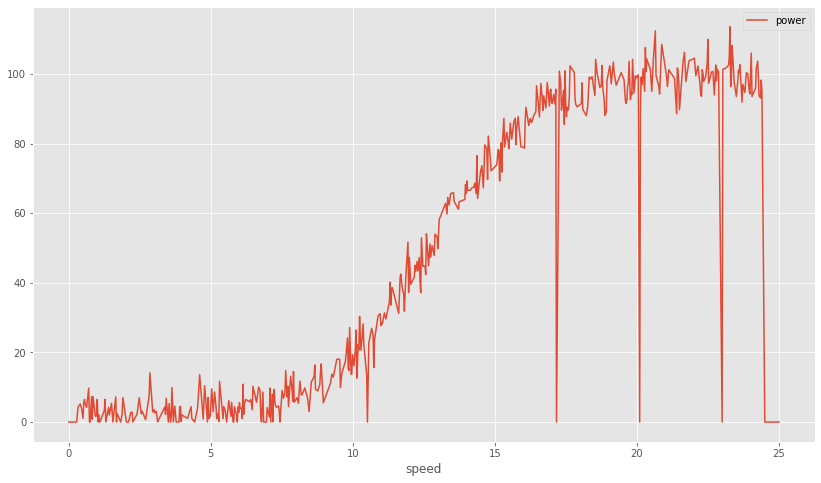

In [4]:
df.plot(x="speed", y="power")

X = df['speed']
y = df['power']

plt.show()

In [5]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014860
std,7.224991,41.614565
min,0.000000,0.000000
25%,6.324750,5.287500
50%,12.550500,41.645000
75%,18.775250,93.540000
max,25.000000,113.560000


From the scatterplot above I can see the data is not linear. There also 500 data points. The graph also follows the structure of the picture above ie the wind turbine begins to output power when the speed hits approximately 3m/s and stops when the speed hits approximately 25m/s. This may mean that any intercept should be set for 3 instead of 0 to give a more accurate linear regression. This is a safety feature to prevent damage to the turbine at high speeds. Note there are some data points where the speed is zero. This may mean the turbines were turned off for maintenance, protection etc or there was a change in wind direction.

<br>

## 3. The model

***



## 3.1 Load the data and split into testing and training data
***

Dataset loaded. Now data is split into test data and training data

<em>df</em> = dataset imported above

<em> test_size:</em>represents the proportion of the dataset to include in the test split. Default is set to None and the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

<em>train_size:</em> represents the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

<em>random_state: </em> Controls the shuffling applied to the data before applying the split. 

<em>shuffle: </em> default=True whether to shuffle the data before splitting. 

<em>stratify: </em> array-like, default=None

Returns two split lists containing train-test split of inputs.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split


In [6]:
# Option 1 for splitting the data
sk.model_selection.train_test_split(df, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

[      speed  power
 144   7.232   9.41
 121   6.131  10.86
 271  13.939  63.91
 295  15.140  77.73
 282  14.389  64.22
 ..      ...    ...
 183   9.434  18.04
 344  17.367  91.21
 441  22.272  93.57
 243  12.337  47.28
 145   7.257   5.25
 
 [375 rows x 2 columns],
       speed   power
 479  23.949   95.36
 416  20.646  112.36
 432  21.722   97.80
 58    3.053    2.84
 489  24.399   95.12
 ..      ...     ...
 463  23.323   98.28
 74    3.804    0.00
 362  18.218   87.98
 397  19.795   94.78
 469  23.549   98.07
 
 [125 rows x 2 columns]]

In [7]:
#Option 2 for splitting the data
#This is the method used for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train

y_train

X_test

y_test

361     89.79
73       0.00
374    102.44
155     10.30
104      3.20
        ...  
110      0.00
318     85.17
428     97.67
29       3.37
437     99.46
Name: power, Length: 165, dtype: float64

<br>

## 3.2 sklearn regression 

In [8]:
X = df['speed']
y = df['power']

### 3.2.1 Method to perform linear regression

In [9]:
#Best fit straight line
X_avg = np.mean(X)
y_avg = np.mean(y)

X_zero = X - X_avg
y_zero = y - y_avg

m = np.sum(X_zero * y_zero)/(np.sum(X_zero * X_zero))
c = y_avg - m * X_avg

### 3.2.2 Method to perform sigmoid regression

In [10]:
#Best fit sigmoid curve
#https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
from scipy.optimize import curve_fit

def sigmoid(X, L, X0, k, b):
    s = L / (1 + np.exp(-k*(X-X0)))+b
    return(s)

p0 = [max(y), np.median(X), 1, min(y)] #mandatory initial guess

popt, pcov = curve_fit(sigmoid, X, y, p0, method='dogbox')

#plt.plot(popt, pcov) #check visual

### 3.2.3 Method to perform curve fit

In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, X, y)
popt


C:\Users\Claire Laptop\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([-48.11108629, 206.84549505,  48.11108217])

In [12]:
#https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

#y_data

X = df['speed']
y = df['power']

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = curve_fit(test_func, X, y, p0=[2,2])


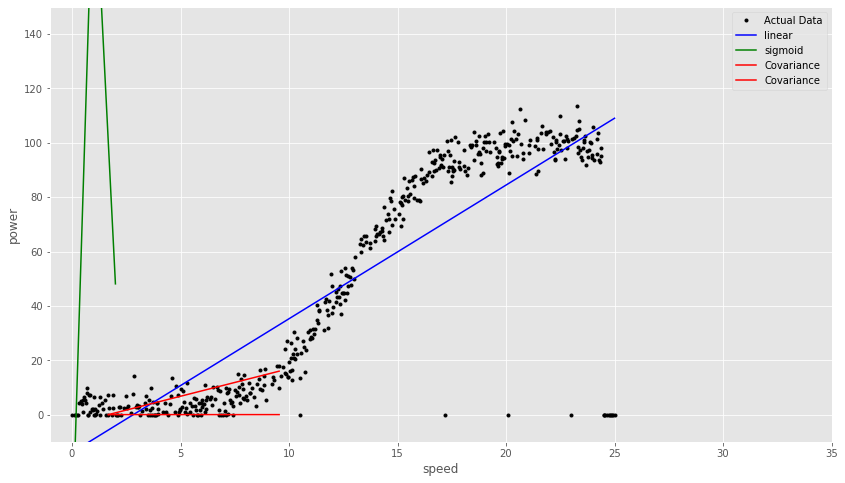

In [13]:
#Best fit straight line
plt.plot(X, y,'k.', label="Actual Data")

plt.plot(X, m * X + c, 'b-', label="linear")#plot best fit straight line

plt.plot(popt, 'g-', label="sigmoid")
plt.plot(params, params_covariance, 'r-', label="Covariance")

plt.xlabel('speed')
plt.ylabel('power')

plt.xlim(-1,35)
plt.ylim(-10,150)

plt.legend()
plt.show()

From the graph above it can be determined that none of these methods are ideal for the machine learning model. Therefore the SKlearn machine learning method will not be used.

## 3.3 Keras NN Linear

<em>Using Keras machine learning module</em>

* Load Data.
* Define Keras Model.
* Compile Keras Model.
* Fit Keras Model.
* Evaluate Keras Model.
* Tie It All Together.
* Make Predictions

In [14]:
#Best fit straight line
X_avg = np.mean(X)
y_avg = np.mean(y)

X_zero = X - X_avg
y_zero = y - y_avg

m = np.sum(X_zero * y_zero)/(np.sum(X_zero * X_zero))
c = y_avg - m * X_avg

# use lambda notion: https://www.w3schools.com/python/python_lambda.asp

# Simple linear equation.
f = lambda x: m * X + c

In [15]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
#single neuron
# model is linear
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
# adam is used as the optimiser as it is adaptive
model.compile('adam', loss='mean_squared_error')

In [16]:
# Train the neural network on our training data.
#fit training dataset to neural network, pass x values in to neural network and determine what y would be. See if these y values match the model y-values
# epoch means that every single xvalue goes throught the neural network 500 times. Everytime it goes through, the NN tries to improve the prediction
# can see the improvement in the epoch log below from 1 to 500 to decrease the loss. Want a small loss value ie miniscule but may depend on the dataset
# if peters out at a high level may need to change the model or check out the inputs as they may need preprocessing
# adam (learning rate) 
model.fit(X_train, y_train, epochs=500)
# 500 epochs can take time

#X_train, X_test, y_train, y_test

Epoch 1/500
11/11 [==============================] - 0s 896us/step - loss: 2548.8363
Epoch 2/500
11/11 [==============================] - 0s 900us/step - loss: 2381.3740
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 2419.5182
Epoch 4/500
11/11 [==============================] - 0s 790us/step - loss: 2340.3615
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 2694.6023
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 2257.1328
Epoch 7/500
11/11 [==============================] - 0s 1000us/step - loss: 2399.0568
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 2433.7458
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 2490.2015
Epoch 10/500
11/11 [==============================] - 0s 901us/step - loss: 2477.4391
Epoch 11/500
11/11 [==============================] - 0s 800us/step - loss: 2271.7155
Epoch 12/500
11/11 [==============================] - 0s 1ms/step - loss

Epoch 97/500
11/11 [==============================] - 0s 896us/step - loss: 1384.6315
Epoch 98/500
11/11 [==============================] - 0s 700us/step - loss: 1464.1593
Epoch 99/500
11/11 [==============================] - 0s 804us/step - loss: 1309.4611
Epoch 100/500
11/11 [==============================] - 0s 800us/step - loss: 1476.3112
Epoch 101/500
11/11 [==============================] - 0s 796us/step - loss: 1424.7640
Epoch 102/500
11/11 [==============================] - 0s 699us/step - loss: 1293.2785
Epoch 103/500
11/11 [==============================] - 0s 700us/step - loss: 1351.3734
Epoch 104/500
11/11 [==============================] - 0s 800us/step - loss: 1410.1482
Epoch 105/500
11/11 [==============================] - 0s 700us/step - loss: 1287.1037
Epoch 106/500
11/11 [==============================] - 0s 1000us/step - loss: 1365.0034
Epoch 107/500
11/11 [==============================] - 0s 800us/step - loss: 1385.4731
Epoch 108/500
11/11 [========================

11/11 [==============================] - 0s 900us/step - loss: 621.1674
Epoch 288/500
11/11 [==============================] - 0s 800us/step - loss: 580.5541
Epoch 289/500
11/11 [==============================] - 0s 800us/step - loss: 577.1046
Epoch 290/500
11/11 [==============================] - 0s 900us/step - loss: 546.3447
Epoch 291/500
11/11 [==============================] - 0s 700us/step - loss: 619.9552
Epoch 292/500
11/11 [==============================] - 0s 900us/step - loss: 549.7423
Epoch 293/500
11/11 [==============================] - 0s 801us/step - loss: 635.9403
Epoch 294/500
11/11 [==============================] - 0s 699us/step - loss: 533.1369
Epoch 295/500
11/11 [==============================] - 0s 700us/step - loss: 576.4597
Epoch 296/500
11/11 [==============================] - 0s 702us/step - loss: 517.8556
Epoch 297/500
11/11 [==============================] - 0s 900us/step - loss: 522.7720
Epoch 298/500
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 797us/step - loss: 455.6838
Epoch 478/500
11/11 [==============================] - 0s 1000us/step - loss: 426.1179
Epoch 479/500
11/11 [==============================] - 0s 1ms/step - loss: 614.0624
Epoch 480/500
11/11 [==============================] - 0s 900us/step - loss: 493.0588
Epoch 481/500
11/11 [==============================] - 0s 800us/step - loss: 502.2518
Epoch 482/500
11/11 [==============================] - 0s 1ms/step - loss: 489.2573
Epoch 483/500
11/11 [==============================] - 0s 800us/step - loss: 448.6373
Epoch 484/500
11/11 [==============================] - 0s 900us/step - loss: 507.6015
Epoch 485/500
11/11 [==============================] - 0s 1ms/step - loss: 527.4740
Epoch 486/500
11/11 [==============================] - 0s 900us/step - loss: 499.5011
Epoch 487/500
11/11 [==============================] - ETA: 0s - loss: 626.006 - 0s 800us/step - loss: 532.0759
Epoch 488/500
11/11 [==========================

In [17]:
# Take four hand-picked values and see their predictions.
# see if they compare to data faked above
model.predict([10.0,15.0,20.0,25.0])

array([[ 41.09477 ],
       [ 60.76221 ],
       [ 80.42964 ],
       [100.097084]], dtype=float32)

In [18]:
# See what f says they are.
#comparable to NN prediction in cell above
# NN knows nothing about the function but has learned how to calculate the function
np.array([[f(i)] for i in [10.0,15.0,20.0,25.0]])

array([[[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]],

       [[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]],

       [[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]],

       [[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]]])

(-10.0, 150.0)

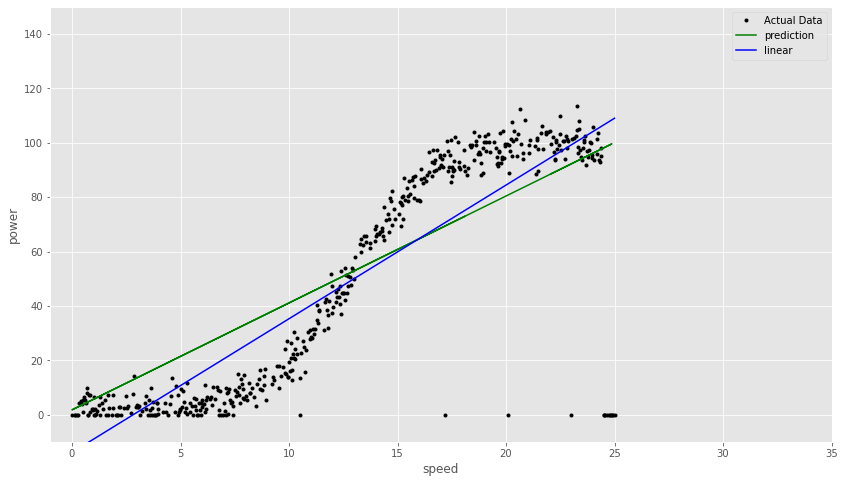

In [19]:
# Let's plot our predictions of the x values we trained on
# ie 
plt.plot(X, y,'k.', label="Actual Data")

plt.plot(X_test, model.predict(X_test), 'g-', label='prediction') #ie after training

plt.plot(X, m * X + c, 'b-', label="linear")#plot best fit straight line
plt.legend();

plt.xlabel('speed')
plt.ylabel('power')

plt.xlim(-1,35)
plt.ylim(-10,150)


In [20]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 1ms/step - loss: 584.9201


584.9201049804688

In [21]:
# Save whole model for download
model.save("model.h5")

While the above method works well, the machine learning evaluation result of 584.9 is not optimal and another model may be better for predicting.

<br>

## 3.4 Keras Neural Neurons

***

### 3.4.1 Keras Neural network using mean squared error method

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

X = df['speed']
y = df['power']

In [23]:
# Create a new neural network.
m = kr.models.Sequential()
# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones',bias_initializer='zeros'))
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [24]:
# Create some input values.
#x = np.arange(-10.0, 10.1, 1.0)
# Run each x value through the neural network.
y = m.predict(X)

In [25]:
# Have a look at x.
X

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64

In [26]:
# Here are the corresponding outputs.
y

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

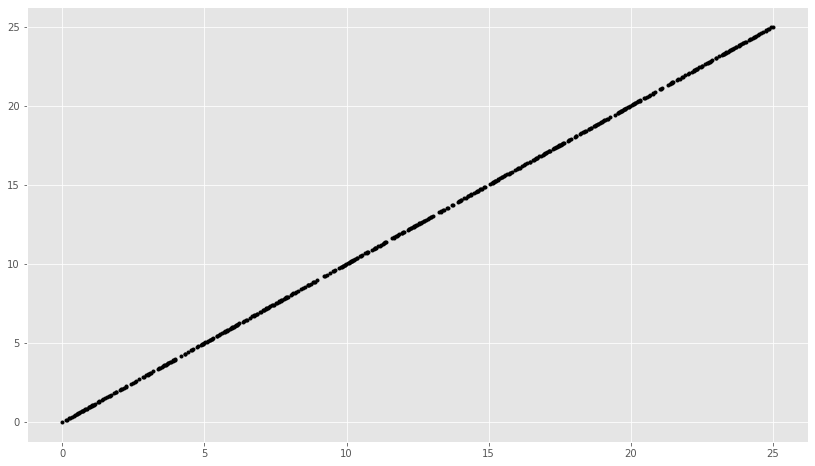

In [27]:
# Plot the values.
plt.plot(X, y, 'k.');

In [28]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 584.9201


584.9201049804688

This efficiency of this method has still not improved.

<br>

### 3.4.2 Single linear neuron with different weight and bias

Use following linear equation: y=2x+1

In [29]:
# Create a new neural network.
mod = kr.models.Sequential()
# Add a single neuron in a single layer, initialised with weight 2 and bias 1.
mod.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer=kr.initializers.Constant(value=2.0), 
                      bias_initializer=kr.initializers.Constant(value=1.0)))
# Compile the model.
mod.compile(loss="mean_squared_error", optimizer="sgd")

In [30]:

# Run each x value through the neural network.
y = mod.predict(X)

In [31]:
mod.fit(X_train, y_train, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 1000us/step - loss: 139084319534.3646
Epoch 2/500
11/11 [==============================] - 0s 900us/step - loss: 21414912609599409356800.0000
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 2915159208246941377238316852707328.0000
Epoch 4/500
11/11 [==============================] - 0s 901us/step - loss: inf                                 
Epoch 5/500
11/11 [==============================] - 0s 1000us/step - loss: inf
Epoch 6/500
11/11 [==============================] - 0s 800us/step - loss: inf
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/500
11/11 [==============================] - 0s 998us/step - loss: nan
Epoch 11/500
11/11 [==============================] - 0s 999us/step - loss: nan
Epoch 12/500
11/11 [=======

Epoch 103/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 104/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 105/500
11/11 [==============================] - 0s 903us/step - loss: nan
Epoch 106/500
11/11 [==============================] - 0s 899us/step - loss: nan
Epoch 107/500
11/11 [==============================] - 0s 899us/step - loss: nan
Epoch 108/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 109/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 110/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 111/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 112/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 113/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 114/500
11/11 [==============================] - 0s 1ms/step - loss: nan
Epoch 115/500
11/11 [=========================

Epoch 307/500
11/11 [==============================] - 0s 900us/step - loss: nan
Epoch 308/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 309/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 310/500
11/11 [==============================] - 0s 700us/step - loss: nan
Epoch 311/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 312/500
11/11 [==============================] - 0s 700us/step - loss: nan
Epoch 313/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 314/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 315/500
11/11 [==============================] - 0s 700us/step - loss: nan
Epoch 316/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 317/500
11/11 [==============================] - 0s 800us/step - loss: nan
Epoch 318/500
11/11 [==============================] - 0s 600us/step - loss: nan
Epoch 319/500
11/11 [=======

In [32]:
mod.evaluate(X_test, y_test)

6/6 [==============================] - 0s 895us/step - loss: nan


nan

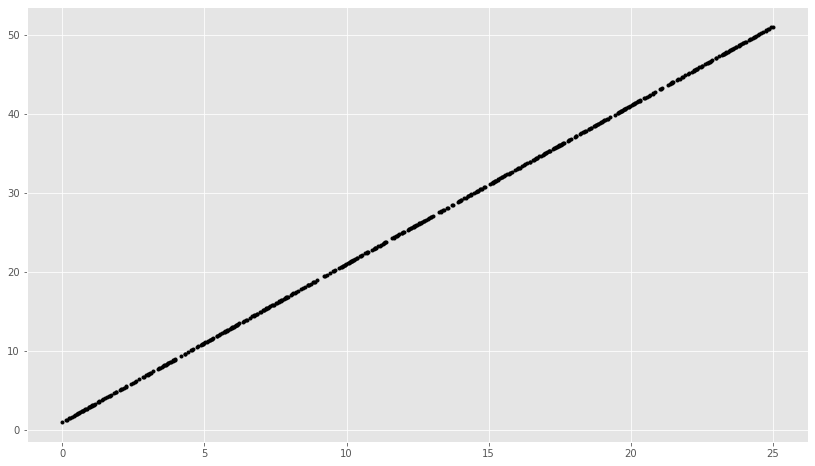

In [33]:
# Plot the values.
plt.plot(X, y, 'k.');

### 3.4.3 Sigmoid activation

In [34]:
# Create a new neural network.
mo = kr.models.Sequential()
# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
mo.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1.0), 
                      bias_initializer=kr.initializers.Constant(value=0.0)))
# Compile the model.
mo.compile(loss="mean_squared_error", optimizer="sgd")

In [35]:
# Create some input values.
#x = np.arange(-10.0, 10.1, 1.0)
# Run each x value through the neural network.
y = mo.predict(X)

In [36]:
mo.fit(X_train, y_train, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 1ms/step - loss: 4119.4657
Epoch 2/500
11/11 [==============================] - 0s 902us/step - loss: 4156.2174
Epoch 3/500
11/11 [==============================] - 0s 904us/step - loss: 3743.4392
Epoch 4/500
11/11 [==============================] - 0s 999us/step - loss: 3819.0533
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 3590.8217
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 3641.0104
Epoch 7/500
11/11 [==============================] - 0s 900us/step - loss: 3956.1675
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 4096.4306
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 4172.8597
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 3920.6529
Epoch 11/500
11/11 [==============================] - 0s 1000us/step - loss: 3756.7322
Epoch 12/500
11/11 [==============================] - 0s 1ms/step - loss: 

Epoch 97/500
11/11 [==============================] - 0s 700us/step - loss: 3837.1727
Epoch 98/500
11/11 [==============================] - 0s 900us/step - loss: 4114.4016
Epoch 99/500
11/11 [==============================] - 0s 800us/step - loss: 3902.9689
Epoch 100/500
11/11 [==============================] - 0s 800us/step - loss: 3840.8430
Epoch 101/500
11/11 [==============================] - 0s 699us/step - loss: 3636.6544
Epoch 102/500
11/11 [==============================] - 0s 800us/step - loss: 4003.3016
Epoch 103/500
11/11 [==============================] - 0s 900us/step - loss: 3912.7007
Epoch 104/500
11/11 [==============================] - 0s 800us/step - loss: 3964.2263
Epoch 105/500
11/11 [==============================] - 0s 800us/step - loss: 3863.6674
Epoch 106/500
11/11 [==============================] - 0s 800us/step - loss: 3722.7879
Epoch 107/500
11/11 [==============================] - 0s 800us/step - loss: 3914.3547
Epoch 108/500
11/11 [=========================

11/11 [==============================] - 0s 800us/step - loss: 3949.3605
Epoch 286/500
11/11 [==============================] - 0s 899us/step - loss: 4127.5570
Epoch 287/500
11/11 [==============================] - 0s 900us/step - loss: 4168.3229
Epoch 288/500
11/11 [==============================] - 0s 800us/step - loss: 3697.4912
Epoch 289/500
11/11 [==============================] - 0s 799us/step - loss: 3658.5755
Epoch 290/500
11/11 [==============================] - 0s 1000us/step - loss: 3782.6606
Epoch 291/500
11/11 [==============================] - 0s 1ms/step - loss: 3907.3253
Epoch 292/500
11/11 [==============================] - 0s 1000us/step - loss: 4024.4992
Epoch 293/500
11/11 [==============================] - 0s 1ms/step - loss: 3924.0428
Epoch 294/500
11/11 [==============================] - 0s 800us/step - loss: 3985.4170
Epoch 295/500
11/11 [==============================] - 0s 800us/step - loss: 3947.9876
Epoch 296/500
11/11 [==============================] - 0s 7

11/11 [==============================] - 0s 1ms/step - loss: 3834.9881
Epoch 475/500
11/11 [==============================] - 0s 800us/step - loss: 3877.3462
Epoch 476/500
11/11 [==============================] - 0s 699us/step - loss: 4077.2969
Epoch 477/500
11/11 [==============================] - 0s 800us/step - loss: 3941.2760
Epoch 478/500
11/11 [==============================] - 0s 1ms/step - loss: 3966.6892
Epoch 479/500
11/11 [==============================] - 0s 1ms/step - loss: 4160.3281
Epoch 480/500
11/11 [==============================] - 0s 995us/step - loss: 4287.7046
Epoch 481/500
11/11 [==============================] - 0s 1ms/step - loss: 4221.3625
Epoch 482/500
11/11 [==============================] - 0s 1ms/step - loss: 3833.2967
Epoch 483/500
11/11 [==============================] - 0s 1ms/step - loss: 3677.6308
Epoch 484/500
11/11 [==============================] - 0s 1ms/step - loss: 3906.3133
Epoch 485/500
11/11 [==============================] - 0s 1ms/step - lo

In [37]:
mo.evaluate(X_test, y_test)

6/6 [==============================] - 0s 999us/step - loss: 3896.3442


3896.34423828125

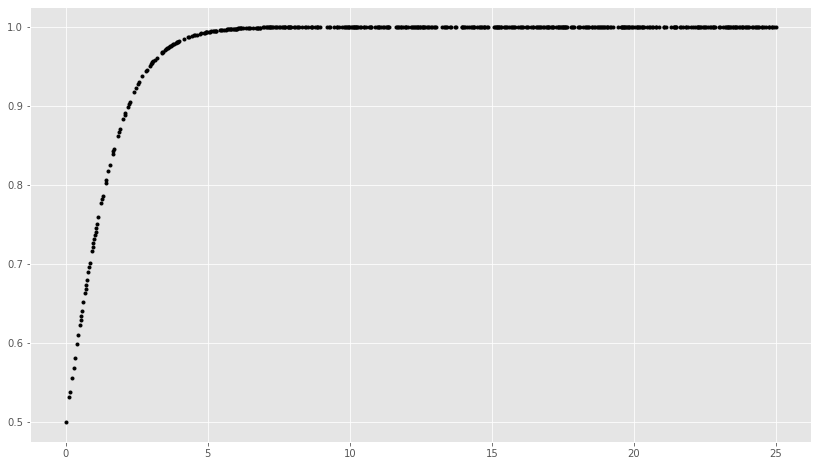

In [38]:
# Plot the values.
plt.plot(X, y, 'k.');

# 4.0 Conclusion

In conclusion I was not able to find an effeicient model so I decided to proceed using the Keras linear regression model discussed in section 3.3. The chosen model is saved in the GIT repository as model.py and model.pkl.

# END